In [1]:
! pip install requests

In [2]:
! pip install pandas

In [3]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math

## 結果データを取得する

In [4]:
def getResultData(id):
    try:
        response = requests.get(f'https://oyster-app-8jboe.ondigitalocean.app/therb/{id}')
        data = json.loads(response.text)
        
        #jsonデータをpandasのdataframeに変換する
        return data['data']
    except:
        throw('no id matches data in database')

getResultDataに渡すidはtherb-frontendのUIのここから取得できます
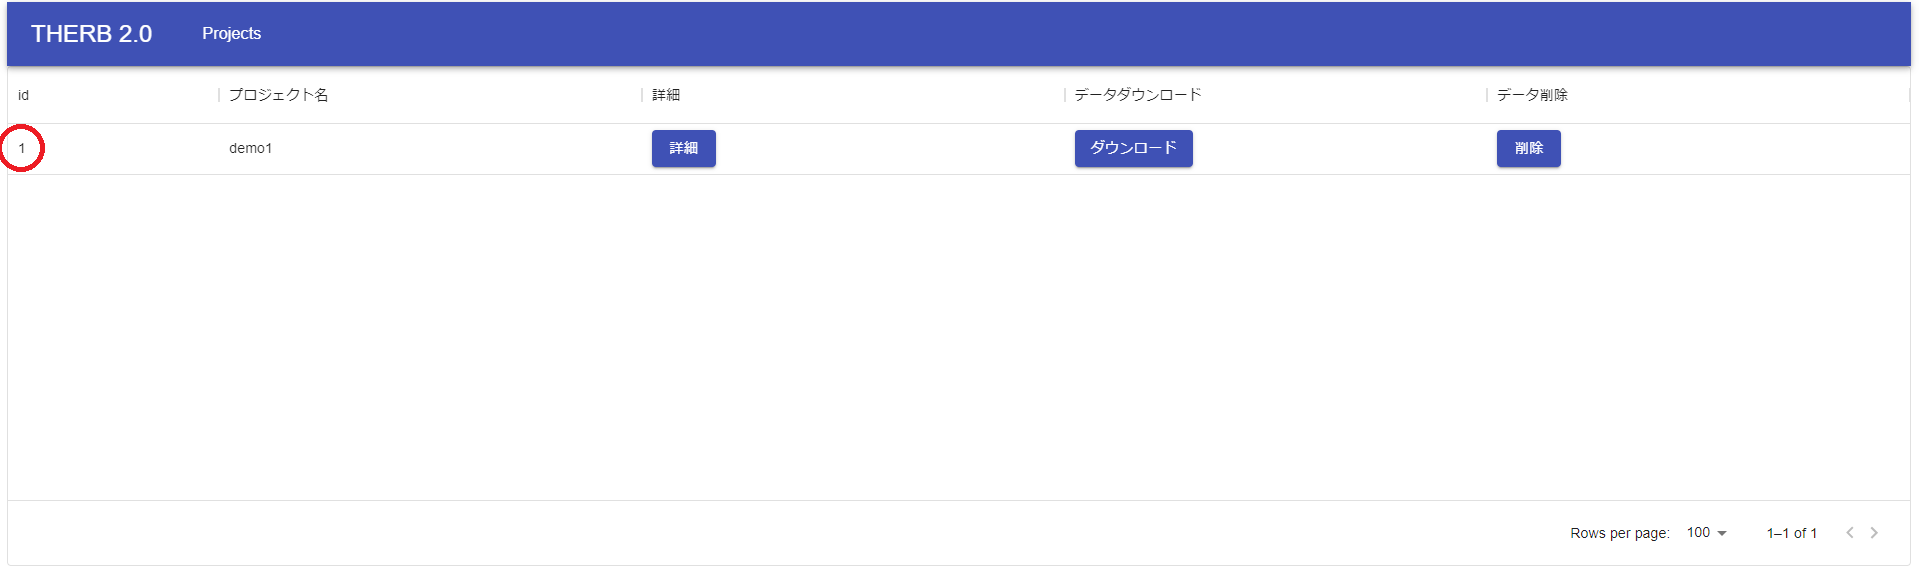

In [5]:
resultData = getResultData(1)

In [6]:
resultData

[{'roomId': 'outdoor',
  'results': {'time': ['01/05/24:00',
    '01/06/01:00',
    '01/06/02:00',
    '01/06/03:00',
    '01/06/04:00',
    '01/06/05:00',
    '01/06/06:00',
    '01/06/07:00',
    '01/06/08:00',
    '01/06/09:00',
    '01/06/10:00',
    '01/06/11:00',
    '01/06/12:00',
    '01/06/13:00',
    '01/06/14:00',
    '01/06/15:00',
    '01/06/16:00',
    '01/06/17:00',
    '01/06/18:00',
    '01/06/19:00',
    '01/06/20:00',
    '01/06/21:00',
    '01/06/22:00',
    '01/06/23:00',
    '01/06/24:00',
    '01/07/01:00',
    '01/07/02:00',
    '01/07/03:00',
    '01/07/04:00',
    '01/07/05:00',
    '01/07/06:00',
    '01/07/07:00',
    '01/07/08:00',
    '01/07/09:00',
    '01/07/10:00',
    '01/07/11:00',
    '01/07/12:00',
    '01/07/13:00',
    '01/07/14:00',
    '01/07/15:00',
    '01/07/16:00',
    '01/07/17:00',
    '01/07/18:00',
    '01/07/19:00',
    '01/07/20:00',
    '01/07/21:00',
    '01/07/22:00',
    '01/07/23:00',
    '01/07/24:00',
    '01/08/01:00',
    '01/

部屋ごとにデータを整理できるようにする必要

In [7]:
def convertToDataframe(resultDict):
    columns = []
    rows = []
    for k,v in resultDict.items():   #ディクショナリーに入っているkeyとitemでループする。列と行で室ごとに入れている。
        columns.append(k)
        rows.append(v)
    print (columns)
    #transposedRows = np.array(rows,dtype=np.float32).T:転置行列　Flipmatrix in GH　
    #参考URL：https://note.nkmk.me/python-numpy-transpose/
    #ここで、n行1列を1行n列に変換している(Pandasのデータ構造に合わせる為)
    transposedRows = np.array(rows).T
    df = pd.DataFrame(data = transposedRows, columns = columns) 
    #DataFrame,DataFrameとはhttps://docs.pyq.jp/python/pydata/pandas/dataframe.html
    #indexで列ってのは何を表しているかを表示させている。表の時間項目の一番上：https://note.nkmk.me/python-pandas-set-index/
    df=df.set_index('time')
    df=df.astype('float32')
    #return transposedRows
    return df

In [8]:
def dataFrameByKey(resultDataList,columnName):
    tempData = []
    columns=[]
    for resultData in resultDataList:
        df = convertToDataframe(resultData["results"])
        try:
            tempData.append(df[columnName])
            columns.append(resultData["roomId"])
        except:
            pass
    df=pd.concat(tempData,axis=1)
    df.columns = columns
    return df

In [9]:
temperaturedf=dataFrameByKey(resultData,"temp")

['time', 'temp', 'relHumidity', 'absHumidity']
['time', 'temp', 'relHumidity', 'absHumidity', 'sensibleLoad', 'latentLoad']
['time', 'temp', 'relHumidity', 'absHumidity', 'sensibleLoad', 'latentLoad']


In [10]:
temperaturedf["outdoor"]

time
01/05/24:00     8.4
01/06/01:00     8.4
01/06/02:00     8.3
01/06/03:00     8.3
01/06/04:00     8.2
               ... 
02/14/14:00    11.4
02/14/15:00    12.0
02/14/16:00    12.6
02/14/17:00    11.5
02/14/18:00    10.5
Name: outdoor, Length: 955, dtype: float32

In [11]:
humiditydf=dataFrameByKey(resultData,"relHumidity")

['time', 'temp', 'relHumidity', 'absHumidity']
['time', 'temp', 'relHumidity', 'absHumidity', 'sensibleLoad', 'latentLoad']
['time', 'temp', 'relHumidity', 'absHumidity', 'sensibleLoad', 'latentLoad']


In [12]:
humiditydf

,outdoor,room1,room2
time,,,
01/05/24:00,67.559998,65.440002,59.230000
01/06/01:00,67.559998,65.320000,59.880001
01/06/02:00,68.019997,65.209999,60.419998
01/06/03:00,68.019997,65.110001,60.919998
01/06/04:00,68.489998,65.019997,61.389999
...,...,...,...
02/14/14:00,74.279999,62.020000,59.410000
02/14/15:00,71.389999,62.040001,56.340000
02/14/16:00,66.430000,62.060001,53.250000


In [13]:
# a_list = []
# for i in range(10):
#     child_list = []
#     a_list.append(child_list)
#     for j in range(20):
#         child_list.append([i, j])

# # 内包表記バージョン
# a_list = [[[i, j] for j in range(20)] for i in range(10)]

In [14]:
df_room1["01/06/01:00":"01/12/04:00"]

NameError: name 'df_room1' is not defined

In [ ]:
#これで、ディクショナリーから欲しい情報を抽出している。
tempDict={}
humidityDict={}
for roomId in temperaturedf.columns:
    if roomId != "outdoor":
        tempDict[roomId]= temperaturedf[roomId].tolist()
        humidityDict[roomId]=humiditydf[roomId].tolist()

In [ ]:
from pythermalcomfort.models import pmv
from pythermalcomfort.utilities import v_relative, clo_dynamic

In [ ]:
>>> from pythermalcomfort.models import pmv_ppd
>>> from pythermalcomfort.utilities import v_relative, clo_dynamic
>>> tdb = 25
>>> tr = 25
>>> rh = 50
>>> v = 0.1
>>> met = 1.4
>>> clo = 0.5
>>> # calculate relative air speed
>>> v_r = v_relative(v=v, met=met)
>>> # calculate dynamic clothing
>>> clo_d = clo_dynamic(clo=clo, met=met)
>>> results = pmv_ppd(tdb=tdb, tr=tr, vr=v_r, rh=rh, met=met, clo=clo_d)
>>> print(results)
#{'pmv': 0.06, 'ppd': 5.1}
>>> print(results['pmv'])
#-0.06
>>> # you can also pass an array-like of inputs
>>> results = pmv_ppd(tdb=[22, 25], tr=tr, vr=v_r, rh=rh, met=met, clo=clo_d)
>>> print(results)
#{'pmv': array([-0.47,  0.06]), 'ppd': array([9.6, 5.1])}

In [ ]:
#ステップ2 それぞれの部屋のデータに関してPMVの算出を自動で行う。
#まさかのステップ3  情報をディクショナリーに登録する。
#多重辞書について：https://kenken-python.com/python-multi-dic/
#Def関数にする。
##Def関数やと、あくまで定義を登録してるわけで関数を実行しているわけではないからディクショナリーを行うときは関数を呼ぶ必要がある！
from pythermalcomfort.models import pmv
from pythermalcomfort.utilities import v_relative, clo_dynamic

def CalculatePMV_PPD():
    #pmvDict={}
    for roomId in tempDict.keys():
    #    print (tempDict[roomId])
    #    print (humidityDict[roomId])
        tdb = tempDict[roomId]
        tr = tempDict[roomId]
        rh = humidityDict[roomId]
        v = 0.05
        met = 1
        clo = 2.0
        #print (tdb)
        # calculate relative air speed
        v_r = v_relative(v=v, met=met)
        # calculate dynamic clothing
        clo_d = clo_dynamic(clo=clo, met=met)
        results = pmv_ppd(tdb=tdb, tr=tr, vr=v_r, rh=rh, met=met, clo=clo_d, limit_inputs=False)
        CalculateComfort[str(roomId)]= results 
        columns = roomId
        #pmvDict[roomId]=results
        #print (results)

In [ ]:
resultData['results']['time'].tolist()

In [ ]:
#関数を起動させるためのもの_ここで関数を起動
CalculateComfort={}
CalculatePMV_PPD()

In [ ]:
CalculateComfort

In [ ]:
# #PmvとPPDのチャートを生成
# #1_ポイントとなるPMVとPPDの位置を生成。

# x1= np.array(CalculateComfort['room1']['pmv'])
# y1= np.array(CalculateComfort['room1']['ppd'])
# #2描写範囲の設定
# fig = plt.figure()
# #ax.set_xlim(left=-3.0, right=3.0)
# #plt.xlim(-3, 3)
# #軸の名前
# plt.xlabel("PMV", fontsize=20)
# #ax.set_ylim(bottom=0, top=100)
# plt.ylim(0, 100)
# plt.ylabel("PPD[%]", fontsize=20)
# #ax=fig.add_subplot(1,1,1)
# # (8)目盛線の表示
# plt.grid(True)
# # #関数の表示__したいけど、上手くいかない。
# x = np.linspace(-3,3,200)
# def y(a):
#     return np.exp(a)
# y1 = 100-95*y(-0.03353*(x**4)-0.2179*(x**2))
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.plot(x,y1,"-")
# plt.show
# # #3_ここで描画する。
# #plt.scatter(x1,y1,s=10,alpha=0.5,linewidths=2,marker=".",c='#aaaaFF',edgecolors='blue')
# # ax = fig.add_subplot(111)
# # ax.axvspan(-0.5, 0.5, 0, 10, color = "coral")
# #plt.show()

In [ ]:
#range関数は小数点にすることが出来ない。
import math
for i in  range(-300,300,5):
    x=i*0.01
    y = 100-95*math.exp(-0.03353*(x**4)-0.2179*(x**2))
    print (y)

In [ ]:
#PmvとPPDのチャートを生成
#1_ポイントとなるPMVとPPDの位置を生成。
x1= np.array(CalculateComfort['room1']['pmv'])
y1= np.array(CalculateComfort['room1']['ppd'])
print(type(x1))
#2描写範囲の設定
fig = plt.figure()

#軸の領域(-3<x<3)
plt.xlim(-3, 3)
#軸の名前
plt.xlabel("PMV", fontsize=20)
plt.ylim(0, 100)
plt.ylabel("PPD[%]", fontsize=20)

#目盛線(grid)の表示
plt.grid(True)
#関数の表示(PPDとPMVの関数の表示)
xl1 = np.linspace(-3,3,200) #x軸のlineという意味
def y(a):
    return np.exp(a)
yl1 = 100-95*y(-0.03353*(xl1**4)-0.2179*(xl1**2))

#快適域の表示
xc1= np.linspace(-0.5,0.5,200)
yc1= 10

#3_ここで描画する。
plt.scatter(x1,y1,s=10,alpha=0.5,linewidths=2,marker=".",c='#aaaaFF',edgecolors='red',label="ObservationPoints")
plt.plot(xl1,yl1,linestyle="solid",color="black",linewidth=0.3)
plt.fill_between(xc1,yc1,where=yc1>xc1,facecolor='#66FF99',alpha=0.5,label="ComfortArea")
plt.legend()
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=10)

plt.show()
print ("快適範囲に含まれる時間は0%存在します。")

In [ ]:
#配列のデータをPMV計算を行う。

# tempArray = np.array(df_room1["temp"])
# tempList = tempArray.tolist()
# relhumidArray = np.array(df_room1["relHumidity"])
# relHumidityList = relhumidArray.tolist()
# absHumidityArray = np.array(df_room1["absHumidity"])
# absHumidityList = absHumidityArray.tolist()
# listlength = len(tempList)

In [ ]:
#1/6.0:00~1/6.24:00までのデータが取れたと仮定
#データ1
yd1=np.array(CalculateComfort['room1']['pmv'])
yd2=yd1[0:25]  #ここも動的に変化が必要
xd1=np.arange(0,25)
plt.ylim(-3, 3)
plt.ylabel("PMV", fontsize=20)
plt.xlabel("datetime_1_6", fontsize=20)
plt.grid(True)
#描写
xc1= np.linspace(0,25,10)
yc1= 0.5
yc2= -0.5
plt.scatter(xd1,yd2,s=10,alpha=0.5,linewidths=2,marker=".",c='#aaaaFF',edgecolors='red',label="ObservationPoints")
plt.fill_between(xc1,yc1,yc2,color = "#66FF99", alpha = 0.5,label="ComfortArea")
plt.legend()
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=10)
plt.show()

In [ ]:
#何かしらで暑い日がいつなのか算出し、データが取れたと仮定
#イメージとしては、一番暑い日、一番寒い日を算出して、前後1日を取った計3日間を算出するイメージ
#データ
yd1=temperaturedf["room1"]["01/05/24:00":"01/08/24:00"] #データを算出する。
xd1=np.arange(0,72)
plt.xlabel("DateTime_1_6___1_8", fontsize=20)
plt.ylabel("Temperature", fontsize=20)
plt.grid(True)
#描写
xct1= np.linspace(0,72,73)
yct1= 28
yct2= 17
plt.scatter(xd1,yd1,s=10,alpha=0.5,linewidths=2,marker=".",c='#aaaaFF',edgecolors='red',label="ObservationPoints")
plt.fill_between(xc1,yc1,yc2,color = "#66FF99", alpha = 0.5,label="ComfortArea")

In [ ]:
#第一ステージ　PMV計算入力　完了
from pythermalcomfort.models import pmv
from pythermalcomfort.utilities import v_relative, clo_dynamic

# tdb = tempDict[roomId]
# tr = tempDict[roomId]
# rh = 60
# v = 0.05
# met = 1
# clo = 2.0
# #print (tdb)
# # calculate relative air speed
# v_r = v_relative(v=v, met=met)
# # calculate dynamic clothing
# clo_d = clo_dynamic(clo=clo, met=met)
# results = pmv(tdb=tdb, tr=tr, vr=v_r, rh=rh, met=met, clo=clo_d, limit_inputs=False)
# print(results)

In [ ]:
#これでもできるが、これだとデータが背離りていしまう。
len(resultData)-1

In [ ]:
tempArray
humidArray
points_array = {'points_series_name': (tempArray, humidArray)}

In [ ]:
%matplotlib inline
from psychrochart import PsychroChart

from psychrochart import load_config
config_style = load_config('default')
from psychrochart import load_zones
config_zone = load_zones()
config_zone['zones'].pop()
points_style = {'s': 9, 'alpha': 0.8, 'color': 'darkorange'}
chart = PsychroChart(config_style, config_zone)
ax = chart.plot()
chart.plot_points_dbt_rh(points_array, scatter_style=points_style)
ax.get_figure()

## とりあえず折れ線グラフで可視化してみる

In [20]:
! pip install matplotlib seaborn

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

### データをすぐに確認するのはpandasのほうが早い

In [ ]:
df_room1['temp'].plot.line(figsize=(20,10))
type df_room1

どの温度の時間帯が多いか？

In [ ]:
df_room2['temp'].plot.line(figsize=(20,10))

In [ ]:
df_room1['temp'].hist(figsize=(20,10),bins=30)

### 快適時間帯の割合は？

In [ ]:
def calcPercentage(data,min,max):
    maxSatisfied = data[lambda x: x<max]
    satisfied = maxSatisfied[lambda x: x>min]
    percentage = len(satisfied)/len(data)*100
    return round(percentage,1)

In [ ]:
calcPercentage(df_room1['temp'],20,28)

In [ ]:
calcPercentage(df_room2['temp'],20,28)

In [ ]:
calcPercentage(df_room1['temp'],20,28)

### visualizeの見栄えをよくする

In [29]:
plt.plot(df_room1.index,df_room1['temp'],label = "temp")
plt.plot(df_room2.index,df_room2['temp'],label = "aaa")
print (type(df_room1.index,df_room1['temp']))

NameError: name 'df_room1' is not defined

#### Seabornは時間がかかりすぎ

In [28]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x="hour", y="roomT")

NameError: name 'df' is not defined

<Figure size 1440x720 with 0 Axes>

In [30]:
#psychrochartを使ってPythonで湿り空気線図を書く
#https://zenn.dev/kinonotofu/articles/210f2835d9a6e3

! pip install psychrochart

In [31]:
#とりあえずは乗ってあるものをそのままプロット
from psychrochart import PsychroChart
from psychrochart import load_zones
config_zone = load_zones()

chart_default = PsychroChart('default')
ax = chart_default.plot()
ax.get_figure()
#config_zone['zones'].pop() # リストの末尾のデータを削除
#config_zone['zones'].pop() # リストの末尾のデータを削除
#ある四角をプロットしてみる。
#config_zone['zones'].append(config_zone['zones'][0].copy())

ax = chart.plot()
ax.get_figure()


C:\Users\81803\anaconda3\lib\site-packages\psychrochart\chart.py:533: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = self.figure.gca(position=position)


NameError: name 'chart' is not defined

In [25]:
#ある四角をプロットしてみる。
config_zone['zones'].append(config_zone['zones'][0].copy())

# 追加したデータの設定
config_zone['zones'][1]['label'] = 'Cold'         # 領域の名称
config_zone['zones'][1]['points_x'] = [0, 15]      # x座標(ここでは乾球温度)
config_zone['zones'][1]['points_y'] = [0, 100]      # y座標(ここでは相対湿度)
config_zone['zones'][1]['style'] = {'edgecolor': [0.0, 0.0, 0.8, 0.8],
                                    'facecolor': [0.0, 0.0, 0.8, 0.5],
                                    'linestyle': '--',
                                    'linewidth': 2} # 塗りつぶしの描画設定（辺の色、面の色、線種、線の太さ）
config_zone['zones'][1]['zone_type'] = 'dbt-rh'     # 座標位置の指定タイプ、他に'xy-points'が指定できる

In [19]:
config_zone

{'zones': [{'zone_type': 'dbt-rh',
   'style': {'edgecolor': [1.0, 0.749, 0.0, 0.8],
    'facecolor': [1.0, 0.749, 0.0, 0.5],
    'linewidth': 2,
    'linestyle': '--'},
   'points_x': [23, 25],
   'points_y': [45, 60],
   'label': 'Summer'},
  {'zone_type': 'dbt-rh',
   'style': {'edgecolor': [0.0, 0.0, 0.8, 0.8],
    'facecolor': [0.0, 0.0, 0.8, 0.5],
    'linestyle': '--',
    'linewidth': 2},
   'points_x': [0, 15],
   'points_y': [0, 100],
   'label': 'Cold'},
  {'zone_type': 'dbt-rh',
   'style': {'edgecolor': [1.0, 0.749, 0.0, 0.8],
    'facecolor': [1.0, 0.749, 0.0, 0.5],
    'linewidth': 2,
    'linestyle': '--'},
   'points_x': [23, 25],
   'points_y': [45, 60],
   'label': 'Summer'}]}

In [ ]:
#3. ベースとなる湿り空気線図のスタイルの設定
from psychrochart import load_config
config_style = load_config('default')

#3_1 線と塗りつぶし領域の表示の有無の設定
config_style['chart_params']['with_constant_dry_temp'] = False  # 乾球温度
config_style['chart_params']['with_constant_h'] = False         # 比エンタルピー
config_style['chart_params']['with_constant_humidity'] = False  # 絶対湿度
config_style['chart_params']['with_constant_rh'] = False        # 相対湿度
config_style['chart_params']['with_constant_v'] = True          # 比容積
config_style['chart_params']['with_constant_wet_temp'] = True   # 湿球温度
config_style['chart_params']['with_zones'] = False              # 塗りつぶし領域

chart = PsychroChart(config_style)
ax = chart.plot()
ax.get_figure()

#3.2 線の色と線種と線の太さの設定
#config_styleは、#をとってもうまく起動しない。やり方の摸索が必要
#config_style['constant_dry_temp']['color'] = [0.0, 0.0, 0.0]  # 線の色
#config_style['constant_dry_temp']['linestyle'] = '-'          # 線種
#config_style['constant_dry_temp']['linewidth'] = 0.5          # 線の太さ

#3.3 描画する線と数値の間隔の設定
#Controlキー+ "/"で一気にコメントアウトが出来るよ。
# 全体
# グラフの左右の端を乾球温度の範囲で指定
# config_style['limits']['range_temp_c'] = [0, 50]            
# # グラフの上下の端を絶対湿度の範囲で指定
# config_style['limits']['range_humidity_g_kg'] = [0, 40]     

# # 乾球温度
# # 線の間隔
# config_style['chart_params']['constant_temp_step'] = 1          
# # 数値の間隔
# config_style['chart_params']['constant_temp_label_step'] = 5    

# # 比エンタルピー
# # 線の両端の値
# config_style['chart_params']['range_h'] = [5, 155]                              
# # 線の間隔
# config_style['chart_params']['constant_h_step'] = 5                             
# # 表示する数値
# config_style['chart_params']['constant_h_labels'] = [5, 25, 50, 75, 100, 125]   
# # 数値の位置（0で左寄せ、1で右寄せ）
# config_style['chart_params']['constant_h_labels_loc'] = 1.0                     

# # 絶対湿度
# # 線の間隔
# config_style['chart_params']['constant_humid_step'] = 1                     
# # 数値の間隔
# config_style['chart_params']['constant_humid_label_step'] = 2               
# # 上下端の数値を表示するか
# config_style['chart_params']['constant_humid_label_include_limits'] = True  

# # 相対湿度
# # 線の値
# config_style['chart_params']['constant_rh_curves'] = [10, 20, 30, 40, 45, 50, 55, 60, 70, 80, 90]   
# # 表示する数値
# config_style['chart_params']['constant_rh_labels'] = [20, 30, 40, 50, 60, 70, 80] 
# # 数値の位置（0で左寄せ、1で右寄せ）                  
# config_style['chart_params']['constant_rh_labels_loc'] = 0.85                     

# # 比容積
# # 線の両端の値
# config_style['chart_params']['range_vol_m3_kg'] = [0.78, 0.98]          
# # 線の間隔
# config_style['chart_params']['constant_v_step'] = 0.02                  
# # 表示する数値
# config_style['chart_params']['constant_v_labels'] = [0.8, 0.9, 0.96]    
# # 数値の位置（0で左寄せ、1で右寄せ）
# config_style['chart_params']['constant_v_labels_loc'] = 1.0             

# # 湿球温度
# # 線の両端の値
# config_style['chart_params']['range_wet_temp'] = [-10, 40]                   
# # 線の間隔
# config_style['chart_params']['constant_wet_temp_step'] = 5                         
# # 表示する数値
# config_style['chart_params']['constant_wet_temp_labels'] = [0, 5, 10, 15, 20, 25, 30, 35]   
# # 数値の位置（0で左寄せ、1で右寄せ）
# config_style['chart_params']['constant_wet_temp_labels_loc'] = 0.05  

In [ ]:
point = {'point1': {'label': 'point1',
                       'style': {'color': [0.85, 0.0, 0.0, 0.5],
                                 'marker': 'o', 
                                 'markersize': 10},
                       'xy': (26, 60)}}

# 描画して設定を確認
chart = PsychroChart(config_style, config_zone)
ax = chart.plot()
chart.plot_points_dbt_rh(point)
ax.get_figure()

In [ ]:
#ドッキングってどうするん？